# Import data

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Hospital_Inpatient_Discharges__SPARCS_De-Identified___Cost_Transparency__Beginning_2009_20250426.csv')
# data information
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192827 entries, 0 to 1192826
Data columns (total 14 columns):
 #   Column                               Non-Null Count    Dtype 
---  ------                               --------------    ----- 
 0   Year                                 1192827 non-null  int64 
 1   Facility Id                          1192827 non-null  int64 
 2   Facility Name                        1192827 non-null  object
 3   APR DRG Code                         1192827 non-null  int64 
 4   APR Severity of Illness Code         1192827 non-null  int64 
 5   APR DRG Description                  1192827 non-null  object
 6   APR Severity of Illness Description  1192617 non-null  object
 7   APR Medical Surgical Code            1192348 non-null  object
 8   APR Medical Surgical Description     1192827 non-null  object
 9   Discharges                           1192827 non-null  object
 10  Mean Charge                          1192827 non-null  object
 11  Median Char

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
0,2016,4,Albany Memorial Hospital,194,1,Heart Failure,Minor,M,Medical,2,"8,375.41","8,375.41","3,585.05","3,585.05"
1,2016,4,Albany Memorial Hospital,194,2,Heart Failure,Moderate,M,Medical,40,"14,029.82","12,176.95","6,182.67","5,253.15"
2,2016,4,Albany Memorial Hospital,194,3,Heart Failure,Major,M,Medical,70,"23,921.77","20,229.81","11,149.49","9,068.10"
3,2016,4,Albany Memorial Hospital,194,4,Heart Failure,Extreme,M,Medical,12,"51,260.45","35,210.82","26,081.70","15,230.62"
4,2016,4,Albany Memorial Hospital,196,4,Cardiac Arrest,Extreme,M,Medical,1,"25,357.84","25,357.84","7,791.75","7,791.75"


In [ ]:
# check duplication
df.duplicated().any()

np.False_

# Check missing values
check missing values through a null check

In [ ]:
# Check missing values
df.isnull().sum()

,0
Year,0
Facility Id,0
Facility Name,0
APR DRG Code,0
APR Severity of Illness Code,0
APR DRG Description,0
APR Severity of Illness Description,210
APR Medical Surgical Code,479
APR Medical Surgical Description,0
Discharges,0


# Observations:
Aftering screening, we see that most columns don't have missing value, but 'APR Severity of Illiness Description' and 'APR Medical Surgical Code' have 211 and 343 missing values. That's because they containing string and we would ignore that. We also see that only 'Year', 'Facility ID', 'APR DRG Code' and 'APR Severity of Illness Code' are in integer.

# Data Cleaning
In order to make sure that mean charge, median charge, mean cost and median cost are data with clean numbers, we need to clean up the missing NaN data inside.

In [ ]:
cost_columns = ['Mean Charge', 'Median Charge', 'Mean Cost', 'Median Cost']

for col in cost_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Storing cleaned data
Afterwards, we stored the cleaned data for further use.

In [ ]:
# storing the new data
df.to_csv('cleaned_data.csv', index=False)

# Turn Year and Discharges to numerical data

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Discharges'] = pd.to_numeric(df['Discharges'], errors='coerce')

In [ ]:
print(df['Year'].dtype)

int64


In [ ]:
print(df['Discharges'].dtype)

float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192827 entries, 0 to 1192826
Data columns (total 14 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   Year                                 1192827 non-null  int64  
 1   Facility Id                          1192827 non-null  int64  
 2   Facility Name                        1192827 non-null  object 
 3   APR DRG Code                         1192827 non-null  int64  
 4   APR Severity of Illness Code         1192827 non-null  int64  
 5   APR DRG Description                  1192827 non-null  object 
 6   APR Severity of Illness Description  1192617 non-null  object 
 7   APR Medical Surgical Code            1192348 non-null  object 
 8   APR Medical Surgical Description     1192827 non-null  object 
 9   Discharges                           1191579 non-null  float64
 10  Mean Charge                          696 non-null      float64
 11

# Data exploration

* The first thing that we want to do is to check the distribution to see outliers.

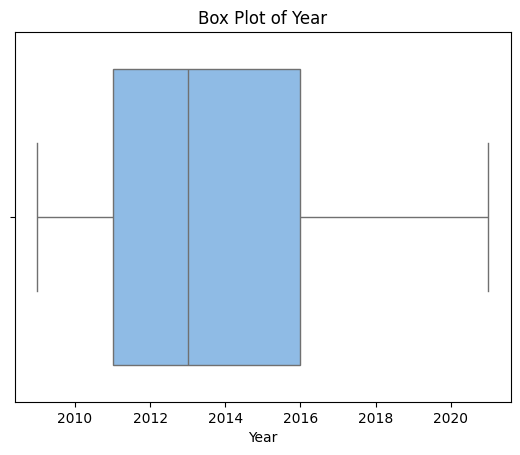

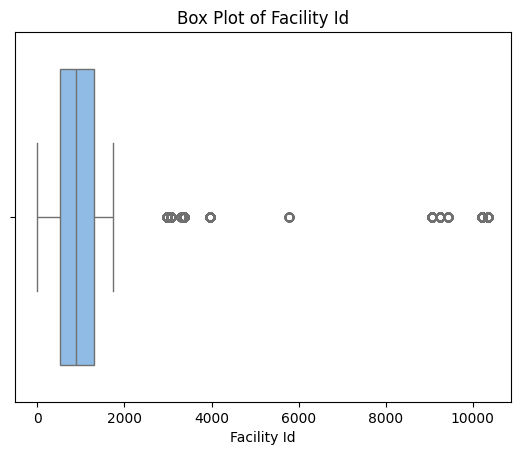

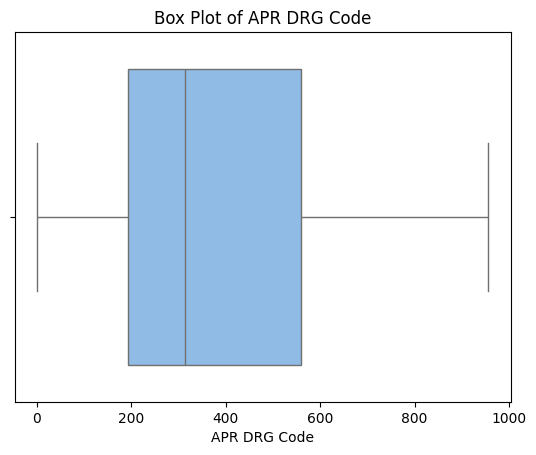

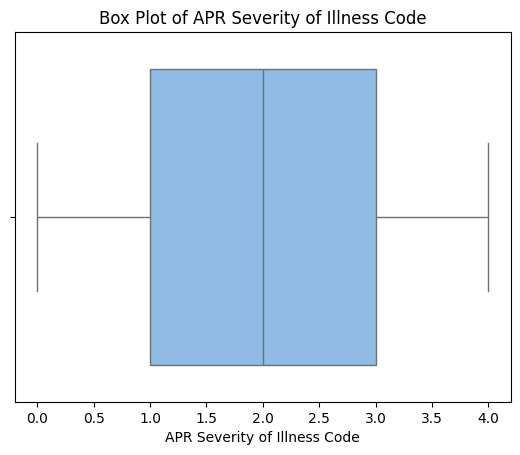

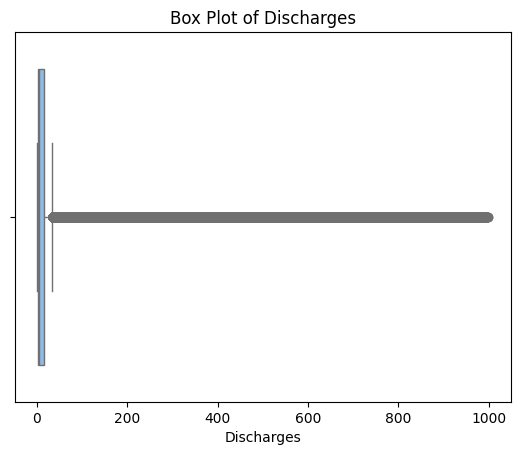

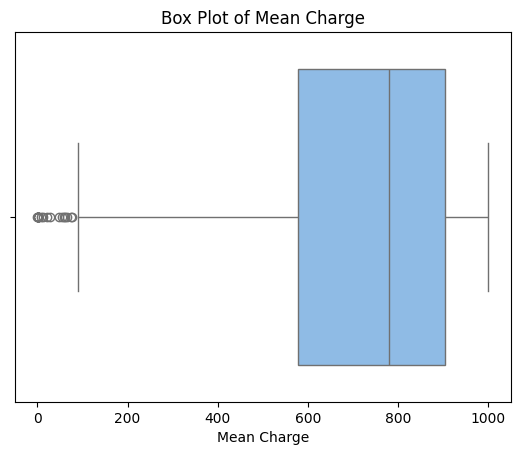

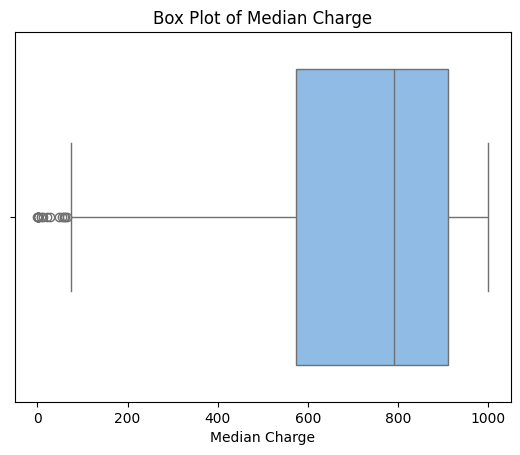

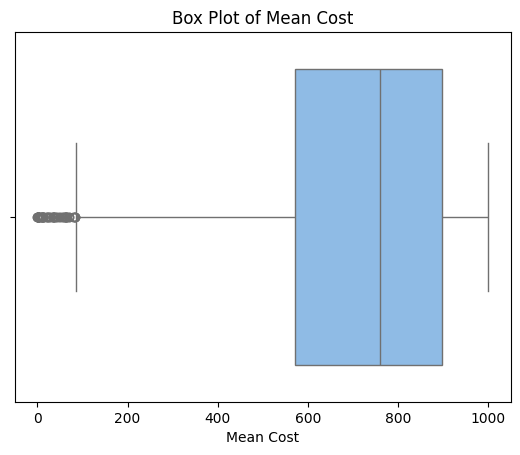

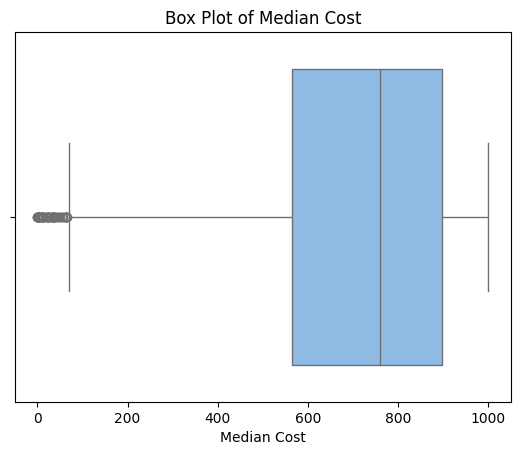

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    sns.boxplot(x=df[col], color = '#81BBF3')
    plt.title(f'Box Plot of {col}')
    plt.show()

# Observation
From these box graph we observed that 'Mean Charge' 'Median Charge', 'Mean Cost' and 'Median Cost' all have outliers. So we would want to clean those outliers.

In [ ]:
# Clean for outliers
for coln in cost_columns:
  Q1 = df[coln].quantile(0.25)
  Q3 = df[coln].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[coln] >= lower_bound) & (df[coln] <= upper_bound)]

## Check our cleaning result

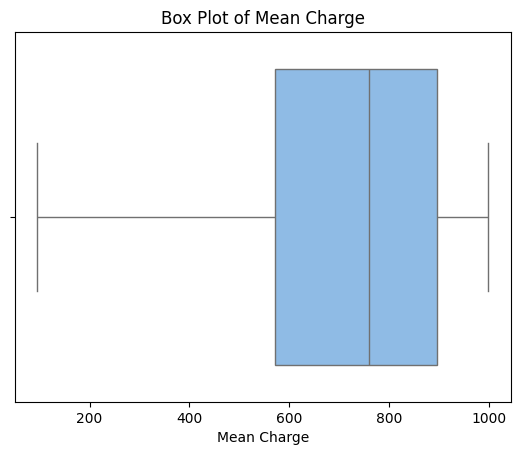

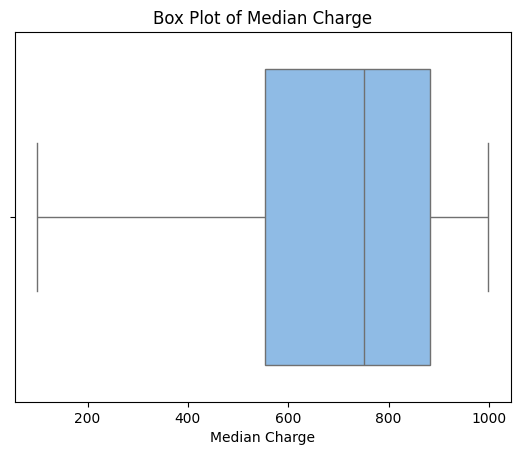

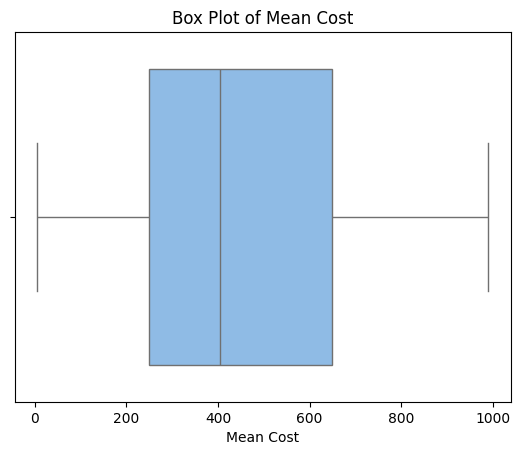

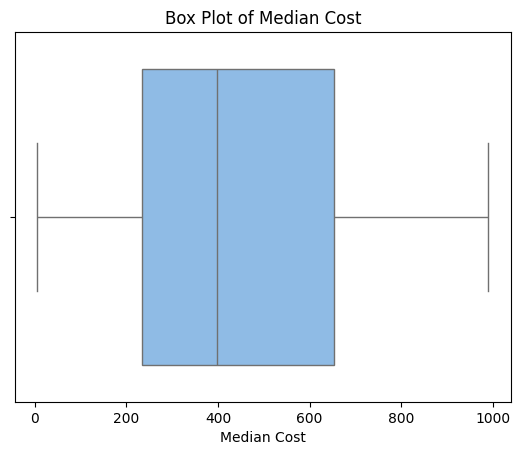

In [ ]:
for coln in colns:
    sns.boxplot(x=df[coln], color = '#81BBF3')
    plt.title(f'Box Plot of {coln}')
    plt.show()

We see that there is now no outliers in the graph.

# Data Visualization

Our first inquiry is to see whether total discharges changes through years.

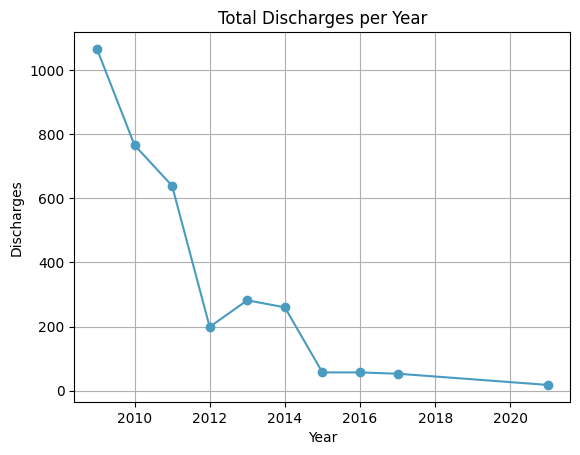

In [ ]:
import matplotlib.pyplot as plt

# 1. Total Discharges per Year
yearly_discharges = df.groupby('Year')['Discharges'].sum()
yearly_discharges.plot(kind='line', marker='o', color = '#499BC0')
plt.title('Total Discharges per Year')
plt.ylabel('Discharges')
plt.xlabel('Year')
plt.grid()
plt.show()

We see an overall decreasing trend of discharges across years.

* Then we ranked the top 10 facilities by discharges

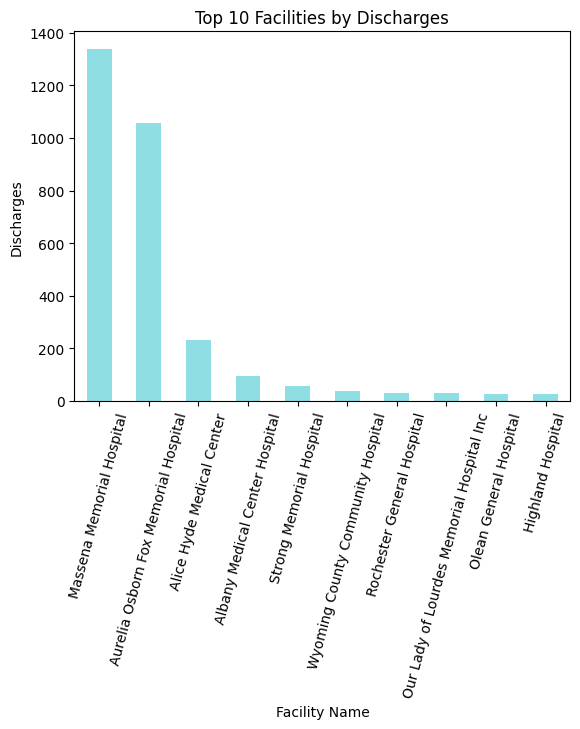

In [ ]:
# 2. Top 10 Facilities by Discharges
top_facilities = df.groupby('Facility Name')['Discharges'].sum().sort_values(ascending=False).head(10)
top_facilities.plot(kind='bar', color = '#8FDEE3')
plt.title('Top 10 Facilities by Discharges')
plt.ylabel('Discharges')
plt.xticks(rotation=75)
plt.show()

* We then also want to see the average mean cost per year and whether it is changing with time

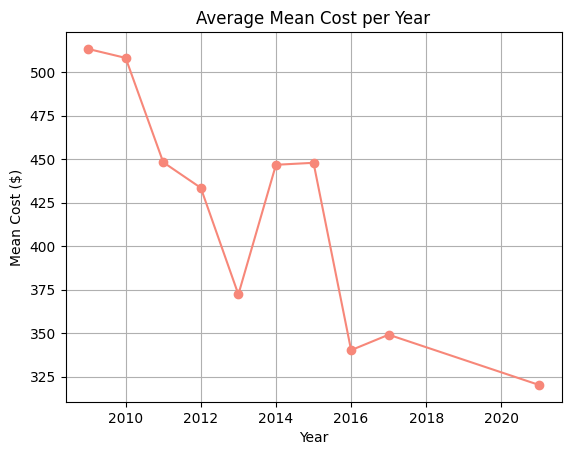

In [ ]:
# 3. Average Mean Cost per Year
yearly_mean_cost = df.groupby('Year')['Mean Cost'].mean()
yearly_mean_cost.plot(kind='line', marker='o', color='#F78779')
plt.title('Average Mean Cost per Year')
plt.ylabel('Mean Cost ($)')
plt.xlabel('Year')
plt.grid()
plt.show()


Despite the flutuation, we see a general decreasing trend of average mean cost across years from 2010 to 2020.

* To visualize the distribution of severity of illiness, we draw a pie chart.

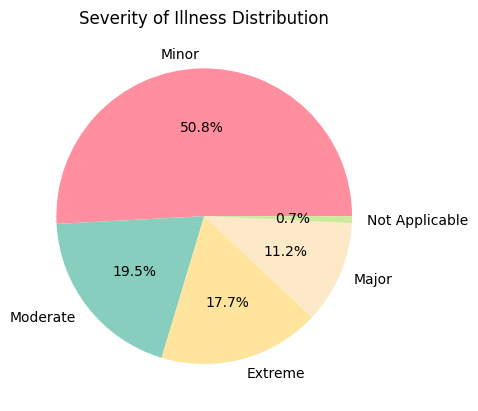

In [ ]:
# 4. Severity of Illness Distribution
severity_counts = df['APR Severity of Illiness Description'].value_counts()
colors = ['#FF8F9F', '#88CEBF', '#FFE49D', '#FDE9C8','#CCEA9C']
severity_counts.plot(kind='pie', autopct='%1.1f%%', colors = colors)
plt.title('Severity of Illness Distribution')
plt.ylabel('')
plt.show()

In this chart, we can see that around 50 % injuries are minor, and only 17.7% are extreme.

* Lastly, we are curious whether mean cost would have any correlation with mean charge.

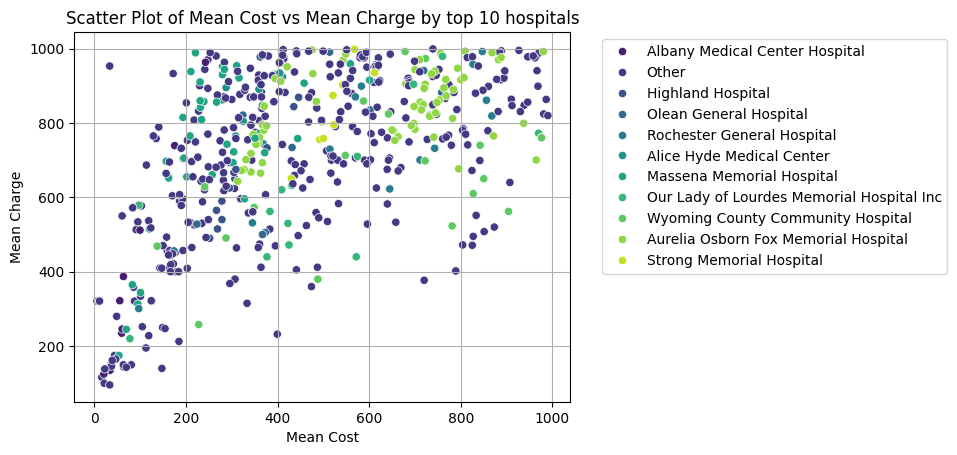

In [ ]:
# 5 Scatter plot correlation between mean charge and cost
df['Top 10 Facility'] = df['Facility Name'].apply(lambda x: x if x in top_facilities.index else 'Other')
sns.scatterplot(
    data = df,
    x = 'Mean Cost',
    y = 'Mean Charge',
    hue = 'Top 10 Facility',
    palette='viridis'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Scatter Plot of Mean Cost vs Mean Charge by top 10 hospitals')
plt.xlabel('Mean Cost')
plt.ylabel('Mean Charge')
plt.grid(True)
plt.show()

This scatter plot shows that the mean cost and mean charge shows positive correlation with each other.

Though, the statistics isn't very strong.

In [ ]:
np.corrcoef(x, y)

array([[1.        , 0.55898542],
       [0.55898542, 1.        ]])

In [ ]:
plt.savefig('total_discharges_per_year.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
# save cleaned csv
df.to_csv('cleaned_data.csv', index=False)